In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os 

In [30]:
#etapa de preprocesamiento no volver a ejecutar warning
#print(os.getcwd())
#print(os.listdir())
#print(os.listdir(os.path.join(os.getcwd(),"2016")))
#for T in range(2021,2022):
#    for j,i in zip(range(0,12),["ENE","FEB","MAR","ABR","MAY","JUN","JUL","AGO","SET","OCT","NOV","DIC"]):
        #print(j,i)
#        if j<9:
#            os.rename(os.path.join(os.getcwd(),str(T),os.listdir(os.path.join(os.getcwd(),str(T)))[j]),os.path.join(os.getcwd(),str(T),"DiagDemandaMax_"+"0"+str(j+1)+"_"+i+"_"+str(T)+".xlsx"))
#        else:
#            os.rename(os.path.join(os.getcwd(),str(T),os.listdir(os.path.join(os.getcwd(),str(T)))[j]),os.path.join(os.getcwd(),str(T),"DiagDemandaMax_"+str(j+1)+"_"+i+"_"+str(T)+".xlsx"))       

IndexError: list index out of range

In [46]:
b=os.listdir(os.path.join(os.getcwd(),"2021"))
b[0][18:-10]
[x[18:-10] for x in os.listdir(os.path.join(os.getcwd(),"2021"))]

['ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO', 'SET', 'OCT', 'NOV']

In [62]:
file_path=os.path.join(os.getcwd(),"2015",os.listdir(os.path.join(os.getcwd(),"2015"))[0])
df=pd.read_excel(file_path)
df.columns=["NADA","HORA","DEMANDA"]
fina=df.loc[range(22,118),["HORA","DEMANDA"]]
fina.reset_index(drop=True,inplace=True)
HORA_GLOBAL=fina["HORA"].to_list()
HORA_GLOBAL
CANTIDAD=[]
for i in HORA_GLOBAL:
    CANTIDAD.append(0)
INCIDENCIA=dict(zip(HORA_GLOBAL,CANTIDAD))
#INCIDENCIA
#fina.plot(kind="area",x="HORA",y="DEMANDA").set_ylim(0,7000)

     HORA     DEMANDA
46  11:45  7218.30055
[['11:45' 7218.30055]]


<ipython-input-49-3475178d5a36>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(X_BAR,rotation=90)


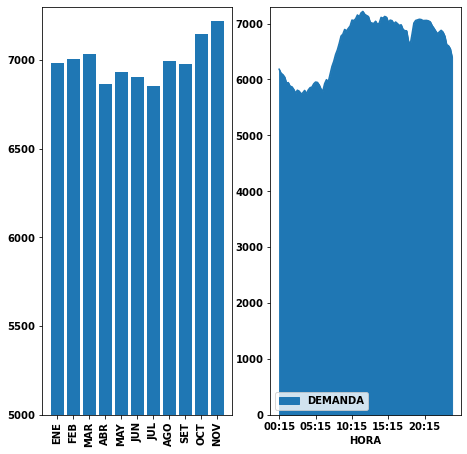

<Figure size 432x288 with 0 Axes>

In [49]:
#fina.max()["DEMANDA"]
fig, axes = plt.subplots(ncols=2, nrows=1,figsize=(7.5,7.5))
Y_BAR=[]
b=os.listdir(os.path.join(os.getcwd(),"2021"))
X_BAR=[x[18:-10] for x in b]
mes=len(b)
#graficos de barras
for i in range(mes):
    file_iter=os.path.join(os.getcwd(),"2021",os.listdir(os.path.join(os.getcwd(),"2021"))[i])
    df_iter=pd.read_excel(file_iter)
    df_iter.columns=["NADA","HORA","DEMANDA"]
    df_u=df_iter.loc[range(22,118),["HORA","DEMANDA"]]
    df_u.reset_index(drop=True,inplace=True)
    Y_BAR.append(df_u.max()["DEMANDA"])
#dia de mayor demanda
for i in range(mes):
    if Y_BAR[i]==max(Y_BAR):
        file_iter=os.path.join(os.getcwd(),"2021",os.listdir(os.path.join(os.getcwd(),"2021"))[i])
        df_iter=pd.read_excel(file_iter)
        df_iter.columns=["NADA","HORA","DEMANDA"]
        df_u=df_iter.loc[range(22,118),["HORA","DEMANDA"]]
        df_u.reset_index(drop=True,inplace=True)
        df_u.plot(ax=axes[1],kind="area",x="HORA",y="DEMANDA").set_ylim(0,7300)
        print(df_u[df_u["DEMANDA"]==df_u.max()["DEMANDA"]])
        print(df_u[df_u["DEMANDA"]==df_u.max()["DEMANDA"]].values[0:1])
        #df_u.max().plot(ax=axes[1],kind="area",x="HORA",y="DEMANDA",color="black").set_ylim(0,7000)
        #axes[1].vlines(["12:45"],0,7000,colors="black")
        #axes[1].fill_between([df_u.max()["HORA"]],[df_u.max()["DEMANDA"]],color="black")
        #df_u.plot(ax=axes[1],kind="area",x="HORA",y="DEMANDA").set_ylim(0,7000)
    else:
        pass
axes[0].bar(X_BAR,Y_BAR)
axes[0].set_ylim(5000,7300)
axes[0].set_xticklabels(X_BAR,rotation=90)
plt.show()
plt.subplots_adjust(right=1.9)
#plt.bar(X_BAR,Y_BAR)
#plt.ylim(5000,6800)

In [63]:
#Hora de mayor incidencia de todos los años
for T in range(2015,2022):
    b=os.listdir(os.path.join(os.getcwd(),str(T)))
    #X_BAR=[x[18:-10] for x in b]
    mes=len(b)
    for i in range(mes):
        file_iter=os.path.join(os.getcwd(),str(T),os.listdir(os.path.join(os.getcwd(),str(T)))[i])
        df_iter=pd.read_excel(file_iter)
        df_iter.columns=["NADA","HORA","DEMANDA"]
        df_u=df_iter.loc[range(22,118),["HORA","DEMANDA"]]
        df_u.reset_index(drop=True,inplace=True)
        df_u[df_u["DEMANDA"]==df_u.max()["DEMANDA"]]
        for j in HORA_GLOBAL:
            if j==df_u[df_u["DEMANDA"]==df_u.max()["DEMANDA"]]["HORA"].values[0]:
                INCIDENCIA[j]=INCIDENCIA[j]+1;
            else:
                pass
#plt.fill_between(INCIDENCIA.keys(),INCIDENCIA.items())

<AxesSubplot:xlabel='HORA'>

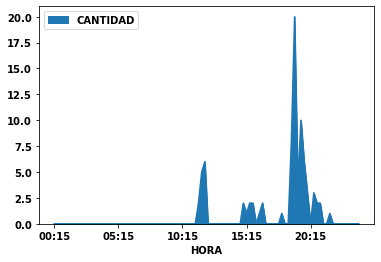

In [64]:
#NN=df_u[df_u["DEMANDA"]==df_u.max()["DEMANDA"]]["HORA"].values[0]
#INCIDENCIA
df_INCIDENCIA = pd.DataFrame([[key, INCIDENCIA[key]] for key in INCIDENCIA.keys()], columns=['HORA', 'CANTIDAD'])
df_INCIDENCIA.plot(kind="area",x="HORA",y="CANTIDAD")

In [58]:
PD_TOTAL=pd.DataFrame()
PD_TOTAL["HORA"]=HORA_GLOBAL
for T in range(2015,2022):
    NEW=[]
    b=os.listdir(os.path.join(os.getcwd(),str(T)))
    #X_BAR=[x[18:-10] for x in b]
    mes=len(b)
    #print(mes)
    for i in range(mes):
        file_iter=os.path.join(os.getcwd(),str(T),os.listdir(os.path.join(os.getcwd(),str(T)))[i])
        df_iter=pd.read_excel(file_iter)
        df_iter.columns=["NADA","HORA","DEMANDA"]
        df_u=df_iter.loc[range(22,118),["HORA","DEMANDA"]]
        df_u.reset_index(drop=True,inplace=True)
        #df_u[df_u["DEMANDA"]==df_u.max()["DEMANDA"]]
        NEW.append(df_u.max()["DEMANDA"])
    for i in range(mes):
        if NEW[i]==max(NEW):
            file_iter=os.path.join(os.getcwd(),str(T),os.listdir(os.path.join(os.getcwd(),str(T)))[i])
            df_iter=pd.read_excel(file_iter)
            df_iter.columns=["NADA","HORA","DEMANDA"]
            df_u=df_iter.loc[range(22,118),["HORA","DEMANDA"]]
            df_u.reset_index(drop=True,inplace=True)
            PD_TOTAL[str(T)]=df_u["DEMANDA"]
            #df_u.plot(ax=axes[1],kind="area",x="HORA",y="DEMANDA").set_ylim(0,7000)
        else:
            pass
            

<AxesSubplot:xlabel='HORA'>

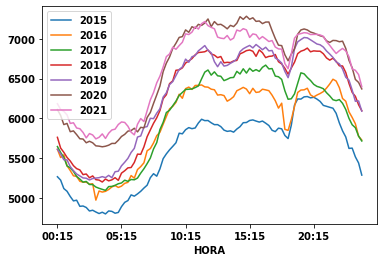

In [59]:
PD_TOTAL.plot(x="HORA",stacked=False)

In [9]:
PD_TOTAL

,HORA,2015,2016,2017,2018
0,00:15,5264.76833,5610.77359,5644.99882,5760.87084
1,00:30,5222.42887,5506.39513,5570.38668,5626.1385
2,00:45,5115.88545,5539.95077,5509.09796,5572.09906
3,01:00,5081.99438,5403.35355,5401.01606,5508.01964
4,01:15,5016.36859,5343.19117,5377.09811,5463.29735
...,...,...,...,...,...
91,23:00,5621.29125,6082.46853,6000.3458,6440.00154
92,23:15,5625.21793,6011.09337,5919.28315,6327.23465
93,23:30,5514.83386,5931.42287,5882.4257,6276.84488
94,23:45,5438.62787,5775.98685,5775.77801,6171.52867
